In [200]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



## Generate Cities List

In [201]:
# List for holding lat_lngs and cities
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

In [202]:
list_of_cities_df=pd.DataFrame(cities)
list_of_cities_df.head()

,0
0,rikitea
1,lolua
2,tommot
3,kamaishi
4,swan hill


Perform API Calls
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).


In [203]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# Creating a list of city info
extract_city_info = []

row_cnt = 1
grp_cnt = 1

#Grouping request call for faster response time
for i, city in enumerate(cities):
       
    if (i % 10 == 0 and i >= 10):
        grp_cnt += 1
        row_cnt += 1

    city_url = url + "&q=" + city
    print("Start %s of Set %s | %s" % (row_cnt, grp_cnt , city))
  
  # Wrapping city weather info with exception to  filter out missing city
    
    try:
        city_weather = requests.get(city_url).json()
        lat = city_weather["coord"]["lat"]
        lng = city_weather["coord"]["lon"]
        max_temp = city_weather["main"]["temp_max"]
        humidity = city_weather["main"]["humidity"]
        clouds = city_weather["clouds"]["all"]
        wind = city_weather["wind"]["speed"]
        country = city_weather["sys"]["country"]
        
    # Filling the data extract_city_info placeholder
        extract_city_info.append({"City": city, 
                          "Lat":lat, 
                          "Lng": lng, 
                          "Max Temp":max_temp,
                          "Humidity":humidity,
                          "Cloudiness": clouds,
                          "Wind Speed":wind,
                          "Country": country,
                       
                          })
    except:
        print("missing city name...move to next line...")
        pass
              

print("End....Load Complete")


Start 1 of Set 1 | rikitea
Start 1 of Set 1 | lolua
missing city name...move to next line...
Start 1 of Set 1 | tommot
Start 1 of Set 1 | kamaishi
Start 1 of Set 1 | swan hill
Start 1 of Set 1 | port alfred
Start 1 of Set 1 | bluff
Start 1 of Set 1 | punta arenas
Start 1 of Set 1 | mayumba
Start 1 of Set 1 | saint-philippe
Start 2 of Set 2 | hithadhoo
Start 2 of Set 2 | katsuura
Start 2 of Set 2 | cidreira
Start 2 of Set 2 | sola
Start 2 of Set 2 | mataura
Start 2 of Set 2 | cape town
Start 2 of Set 2 | fuyang
Start 2 of Set 2 | lata
Start 2 of Set 2 | qaanaaq
Start 2 of Set 2 | new norfolk
Start 3 of Set 3 | namibe
Start 3 of Set 3 | ixtapa
Start 3 of Set 3 | emerald
Start 3 of Set 3 | nikolskoye
Start 3 of Set 3 | puerto ayora
Start 3 of Set 3 | seoul
Start 3 of Set 3 | tuktoyaktuk
Start 3 of Set 3 | hilo
Start 3 of Set 3 | kapaa
Start 3 of Set 3 | grand river south east
missing city name...move to next line...
Start 4 of Set 4 | qasigiannguit
Start 4 of Set 4 | ushuaia
Start 4 of Se

Start 25 of Set 25 | taft
Start 25 of Set 25 | port augusta
Start 25 of Set 25 | denpasar
Start 25 of Set 25 | tutubigan
Start 25 of Set 25 | egvekinot
Start 25 of Set 25 | marawi
Start 25 of Set 25 | lemon tree passage
Start 26 of Set 26 | hopelchen
Start 26 of Set 26 | oistins
Start 26 of Set 26 | saint-louis
Start 26 of Set 26 | graham
Start 26 of Set 26 | upington
Start 26 of Set 26 | sedalia
Start 26 of Set 26 | goderich
Start 26 of Set 26 | lagoa
Start 26 of Set 26 | bodden town
Start 26 of Set 26 | blagoyevo
Start 27 of Set 27 | nizhneyansk
missing city name...move to next line...
Start 27 of Set 27 | marilia
Start 27 of Set 27 | palmer
Start 27 of Set 27 | tilichiki
Start 27 of Set 27 | viligili
missing city name...move to next line...
Start 27 of Set 27 | lima duarte
Start 27 of Set 27 | salinas
Start 27 of Set 27 | paragominas
Start 27 of Set 27 | le port
Start 27 of Set 27 | hambantota
Start 28 of Set 28 | vitim
Start 28 of Set 28 | hirtshals
Start 28 of Set 28 | karkaralins

Start 49 of Set 49 | ambon
Start 49 of Set 49 | karlskoga
Start 49 of Set 49 | bealanana
Start 49 of Set 49 | champerico
Start 49 of Set 49 | dhrangadhra
Start 49 of Set 49 | waingapu
Start 49 of Set 49 | milas
Start 49 of Set 49 | juegang
Start 49 of Set 49 | half moon bay
Start 50 of Set 50 | azare
Start 50 of Set 50 | staryy nadym
Start 50 of Set 50 | cavalcante
Start 50 of Set 50 | baruun-urt
Start 50 of Set 50 | ebejico
Start 50 of Set 50 | batagay-alyta
Start 50 of Set 50 | mandalgovi
Start 50 of Set 50 | bargal
missing city name...move to next line...
Start 50 of Set 50 | tenenkou
Start 50 of Set 50 | karaul
missing city name...move to next line...
Start 51 of Set 51 | wasilla
Start 51 of Set 51 | port hardy
Start 51 of Set 51 | beloha
Start 51 of Set 51 | bayanday
Start 51 of Set 51 | warqla
missing city name...move to next line...
Start 51 of Set 51 | marcona
missing city name...move to next line...
Start 51 of Set 51 | bolungarvik
missing city name...move to next line...
Star

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [204]:
city_weather_info=pd.DataFrame(extract_city_info)
city_weather_info.head()

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,100,PF,72,-23.12,-134.97,68.34,25.93
1,tommot,85,RU,73,58.97,126.27,60.42,1.95
2,kamaishi,100,JP,98,39.28,141.86,52.68,11.39
3,swan hill,48,AU,71,-35.34,143.56,50.88,4.38
4,port alfred,0,ZA,18,-33.59,26.89,79.00,7.00


In [205]:
# Convert array of JSONs into Pandas DataFrame
city_weather_info=pd.DataFrame(extract_city_info)

# Export the City_Data into a csv
city_weather_info.to_csv(r'C:\Users\netty\WUSTL201904DATA2\02-Homework\06-Python-APIs\Instructions\starter_code\Cities.csv')
#Record Summary
city_weather_info.count()

City          536
Cloudiness    536
Country       536
Humidity      536
Lat           536
Lng           536
Max Temp      536
Wind Speed    536
dtype: int64

#### Latitude vs. Temperature Plot

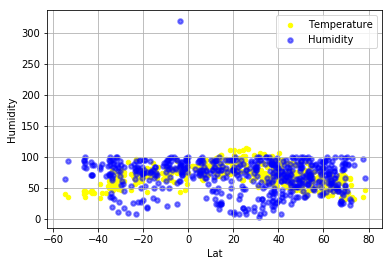

In [217]:
# Latitude vs Temperature; Latitude vs Humidity
ax = city_weather_info.plot(kind='scatter', x='Lat', y='Max Temp',
color='yellow', label='Temperature');
city_weather_info.plot(kind='scatter', x='Lat', y='Humidity',
color='blue', label='Humidity',
linewidths=2, marker="o",alpha=0.50,ax=ax);
plt.grid(True)
# Save the figure
plt.savefig(r'C:\Users\netty\WUSTL201904DATA2\02-Homework\06-Python-APIs\Instructions\starter_code\Fig1_Lat_vs_MaxTemp')

# Show plot
plt.show()

Fig1_Lat_vs_MaxTemp vs. Humidity -this shows the theory that relative humidity is dependent on air temperature,yet not at all   times.  If the water vapor content stays the same and the temperature drops, the relative humidity increases.  If the water vapor content stays the same and the temperature rises, the relative humidity decreases.  This is because colder air doesn’t require as much moisture to become saturated as warmer air.( Reference:https://climate.ncsu.edu/edu/Tilt)

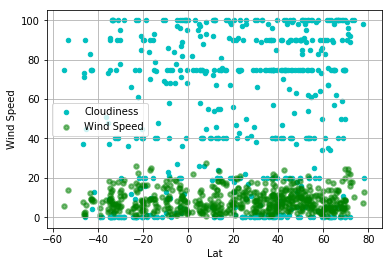

In [216]:

# Latitude vs Cloudiness; Latitude vs Wind Speed
ax = city_weather_info.plot(kind='scatter', x='Lat', y='Cloudiness',
color='c', label='Cloudiness');
city_weather_info.plot(kind='scatter', x='Lat', y='Wind Speed',
color='g', label='Wind Speed',
linewidths=2, marker="o",alpha=0.50,ax=ax);
plt.grid(True)
# Save the figure
plt.savefig(r'C:\Users\netty\WUSTL201904DATA2\02-Homework\06-Python-APIs\Instructions\starter_code\Fig2_Lat_vs_windSpeed_Cloudiness')


# Show plot
plt.show()

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot